In [18]:
#this code creates and cleans the data and uploads it to a mySQL database;
#import dependencies
# Dependencies
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

#models for predicting game outcomes;

# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats

import os

In [2]:
# Store filepath in a variable
file_one = "machine_learning_data.csv"

In [3]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
master_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [4]:
master_df.columns

Index(['gameid', 'league', 'playerid', 'gamelength', 'team', 'teamkills',
       'teamdeaths', 'a', 'fb', 'fbtime', 'teamdragkills', 'oppdragkills',
       'elders', 'oppelders', 'herald', 'heraldtime', 'ft', 'fttime',
       'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'wards', 'wpm',
       'wardshare', 'wardkills', 'wcpm', 'visionwards', 'totalgold',
       'minionkills', 'monsterkills', 'monsterkillsownjungle',
       'monsterkillsenemyjungle', 'cspm', 'goldat10', 'oppgoldat10', 'gdat10',
       'goldat15', 'oppgoldat15', 'gdat15', 'xpat10', 'oppxpat10', 'xpdat10',
       'csat10', 'oppcsat10', 'csdat10', 'csat15', 'oppcsat15', 'csdat15',
       'blue_result'],
      dtype='object')

In [5]:
# GOTO do analytics on this data to figure out what is what; 

lec_df = master_df.loc[master_df['league'] == "LEC"]
lck_df = master_df.loc[master_df['league'] == "LCK"]
lcs_df = master_df.loc[master_df['league'] == "LCS"]
lms_df = master_df.loc[master_df['league'] == "LMS"]
nalcs_df = master_df.loc[master_df['league'] == "NALCS"]

In [6]:
lec_games = len(lec_df)
lck_games = len(lck_df)
lcs_games = len(lcs_df)
lms_games = len(lms_df)
nalcs_games = len(nalcs_df)

In [7]:
#count the number of blueside wins

results = master_df.groupby(['blue_result']).count()

blue_wins = results['gameid'][1]

blue_losses = results['gameid'][0]

total_matches = len(master_df)

total_matches


3877

In [8]:
blue_win_overall = blue_wins / total_matches

blue_win_percentage = blue_win_overall * 100

blue_loss_percentage = blue_losses / total_matches

print(f"the blue team wins {blue_win_percentage:.2f}% of the time")


the blue team wins 55.12% of the time


In [9]:
#plot a graph to show if gold is a good determinator of win

total_games = master_df.groupby('team')['team'].count()

total_wins = master_df.groupby('team')['blue_result'].apply(lambda x: x[x == 'blue win'].count())

damage = master_df.groupby('team')['dmgtochamps'].sum()

wards = master_df.groupby('team')['wards'].sum()

total_gold = master_df.groupby('team')['totalgold'].sum()

damage_per_game = damage / total_games

wards_per_game = wards / total_games

gold_per_game = total_gold / total_games

win_percentage = (total_wins / total_games)*100

In [11]:
#create a dataframe for this data

win_percentage_df = pd.DataFrame(win_percentage)

total_wards_df = pd.DataFrame(wards_per_game)

total_damage_per_game = pd.DataFrame(damage_per_game)

total_gold_per_game = pd.DataFrame(gold_per_game)

total_games_df = pd.DataFrame(total_games)



combined_1 = win_percentage_df.merge(total_damage_per_game, on='team')

combined_2 = combined_1.merge(total_wards_df, on='team')

combined_3 = combined_2.merge(total_gold_per_game, on='team')





In [12]:
total_games_df.columns = ['team_name']

combined_4 = combined_3.merge(total_games_df, on='team')

In [13]:
combined_4.columns = ['win_percentage', 'damage_per_game', 'wards_per_game', 'gold_per_game', 'total_games']

final_df = combined_4.loc[combined_4.total_games > 20]

In [14]:
final_df.head()

,win_percentage,damage_per_game,wards_per_game,gold_per_game,total_games
team,,,,,
100 Thieves,60.000000,70963.000000,132.220000,68396.760000,50
AHQ e-Sports Club,53.571429,63364.071429,127.142857,62313.238095,84
Afreeca Freecs,59.595960,65178.949495,157.616162,66973.191919,99
Alpha Esports,42.857143,55373.952381,107.000000,55005.952381,21
BBQ Olivers,39.655172,63566.172414,158.034483,66391.120690,58


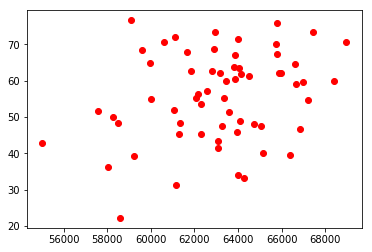

In [15]:
y = final_df.win_percentage
x_gold = final_df.gold_per_game

plt.scatter(x_gold, y, marker="o", facecolors="red")

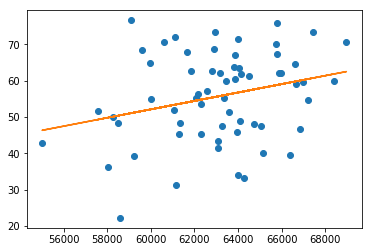

In [22]:
from scipy.stats import linregress

(slope, intercept, _, _, _)  = linregress(x_gold, y)

fit = slope * x_gold + intercept

fig, ax = plt.subplots()

ax.plot(x_gold, y, linewidth=0, marker="o")

ax.plot(x_gold, fit)

plt.show()

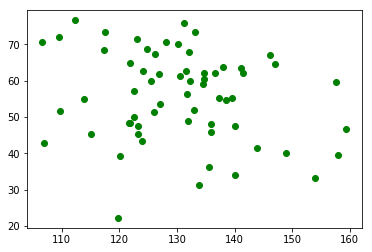

In [16]:
x_wards = final_df.wards_per_game

plt.scatter(x_wards, y, marker="o", facecolors="green")

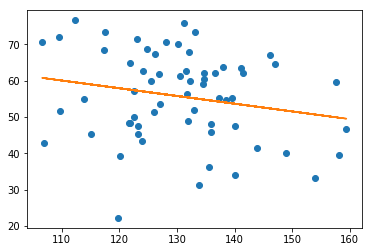

In [25]:
(slope, intercept, _, _, _)  = linregress(x_wards, y)

fit = slope * x_wards + intercept

fig, ax = plt.subplots()

ax.plot(x_wards, y, linewidth=0, marker="o")

ax.plot(x_wards, fit)

plt.show()

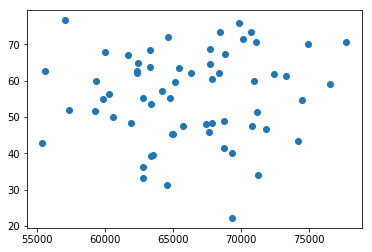

In [17]:
x_damage = final_df.damage_per_game

plt.scatter(x_damage, y, marker="o")

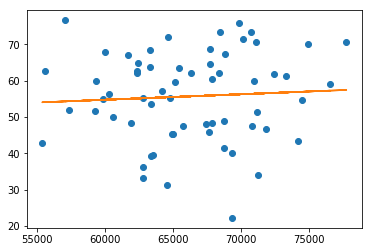

In [23]:
(slope, intercept, _, _, _)  = linregress(x_damage, y)

fit = slope * x_damage + intercept

fig, ax = plt.subplots()

ax.plot(x_damage, y, linewidth=0, marker="o")

ax.plot(x_damage, fit)

plt.show()